In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV

In [4]:
df = pd.read_csv('sigma_cabs.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [6]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype('object')

In [7]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [8]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [9]:
df.nunique()

Trip_ID                        131662
Trip_Distance                   10326
Type_of_Cab                         5
Customer_Since_Months              11
Life_Style_Index                55978
Confidence_Life_Style_Index         3
Destination_Type                   14
Customer_Rating                  3931
Cancellation_Last_1Month            9
Var1                              122
Var2                               58
Var3                               96
Gender                              2
Surge_Pricing_Type                  3
dtype: int64

# Segregating into 3 dataframes to impute null values according class differentiation

In [10]:
s2 = df[df['Surge_Pricing_Type']==2]

In [11]:
s1 = df[df['Surge_Pricing_Type']==1]

In [12]:
s3 = df[df['Surge_Pricing_Type']==3]

In [13]:
s2.isnull().sum()*100/len(s2)

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.239388
Customer_Since_Months           4.477507
Life_Style_Index               15.225286
Confidence_Life_Style_Index    15.225286
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           52.425610
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [14]:
s1.isnull().sum()*100/len(s1)

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.451606
Customer_Since_Months           4.214742
Life_Style_Index               15.345043
Confidence_Life_Style_Index    15.345043
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           65.830087
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [15]:
s3.isnull().sum()*100/len(s3)

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.423303
Customer_Since_Months           4.679380
Life_Style_Index               15.465214
Confidence_Life_Style_Index    15.465214
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           48.983655
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [16]:
s1 = s1.drop(columns=['Var1'])
s2 = s2.drop(columns=['Var1'])
s3 = s3.drop(columns=['Var1'])


In [17]:
s3.shape

(47720, 13)

In [18]:
s2.shape

(56728, 13)

In [19]:
s1.shape

(27214, 13)

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
df.skew()

Trip_Distance               0.723752
Customer_Since_Months      -0.246954
Life_Style_Index            0.193994
Customer_Rating            -0.191131
Cancellation_Last_1Month    1.550869
Var1                        0.465401
Var2                        1.184634
Var3                        0.828977
Surge_Pricing_Type         -0.255149
dtype: float64

# Imputing Null Values based on the datatypes and the Classes

In [22]:
sm = SimpleImputer(strategy='most_frequent')
data = sm.fit_transform(s1.select_dtypes('object'))
data2 = sm.fit_transform(s2.select_dtypes('object'))
data3 = sm.fit_transform(s3.select_dtypes('object'))


In [23]:
sm = SimpleImputer(strategy='mean')
data_num = sm.fit_transform(s1.select_dtypes('number'))
data_num1 = sm.fit_transform(s2.select_dtypes('number'))
data_num2 = sm.fit_transform(s3.select_dtypes('number'))


In [24]:
data = pd.DataFrame(data,columns = s1.select_dtypes('object').columns)
data2 = pd.DataFrame(data2,columns = s2.select_dtypes('object').columns)
data3 = pd.DataFrame(data3,columns = s3.select_dtypes('object').columns)


In [25]:
data_num = pd.DataFrame(data_num,columns = s1.select_dtypes('number').columns)
data_num1 = pd.DataFrame(data_num1,columns = s2.select_dtypes('number').columns)
data_num2 = pd.DataFrame(data_num2,columns = s3.select_dtypes('number').columns)


In [26]:
s1 = pd.concat([data,data_num],axis=1)
s2 = pd.concat([data2,data_num1],axis=1)
s3 = pd.concat([data3,data_num2],axis=1)


In [27]:
df1 = pd.concat([s1,s2,s3])

In [28]:
df.shape

(131662, 14)

In [29]:
df1.shape

(131662, 13)

In [30]:
df1.isnull().sum()

Trip_ID                        0
Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

# Checking for Class imbalance

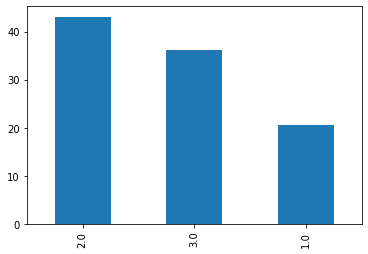

In [31]:
(df1['Surge_Pricing_Type'].value_counts(normalize=True)*100).plot(kind='bar')

In [32]:
df1['Surge_Pricing_Type'].value_counts()

2.0    56728
3.0    47720
1.0    27214
Name: Surge_Pricing_Type, dtype: int64

In [33]:
df1 = df1.drop(columns=['Trip_ID'])

In [34]:
df1.shape

(131662, 12)

# **Outliers**

In [35]:
df2 = df1.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


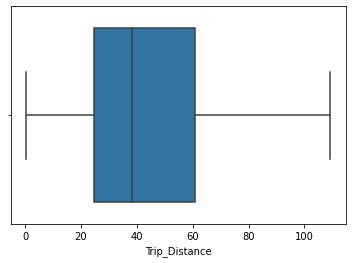

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


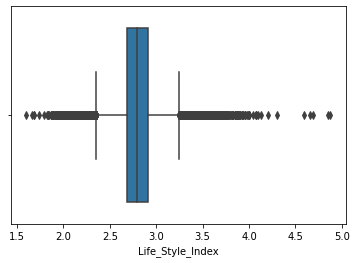

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


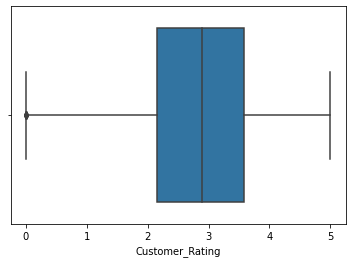

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


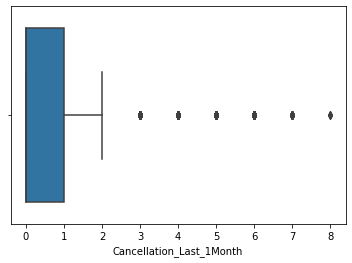

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


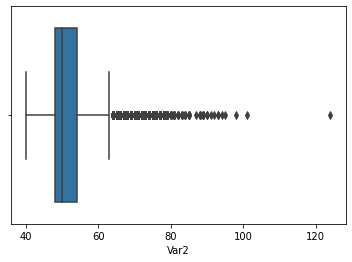

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


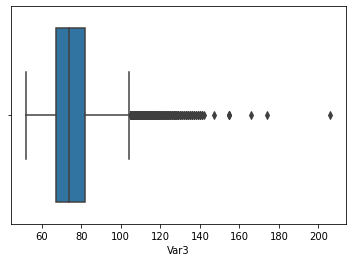

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


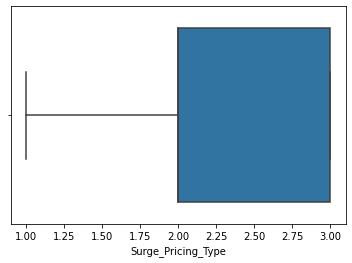

In [36]:
for i in df2.select_dtypes('number'):
  sns.boxplot(df2[i])
  plt.show()

In [37]:
for i in df2.select_dtypes('number').columns:
  q1 = df2[i].quantile(0.25)
  q3 = df2[i].quantile(0.75)
  iqr = q3-q1
  ll = q1-(1.5*iqr)
  ul = q3+(1.5*iqr)
  df2 = df2[(df2[i]>ll)&(df2[i]<ul)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


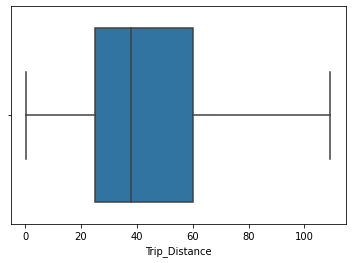

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


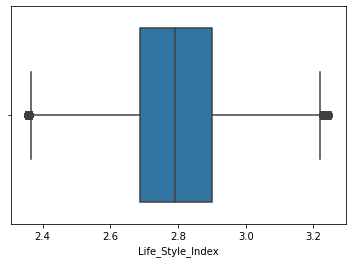

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


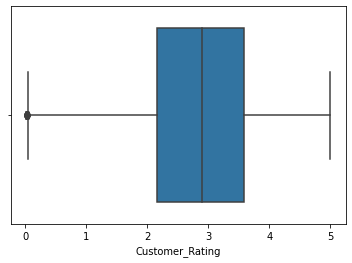

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


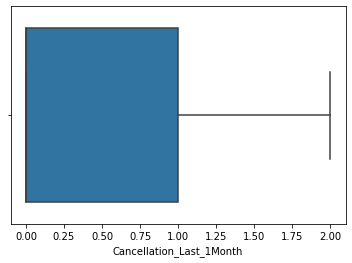

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


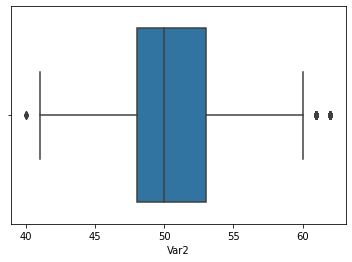

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


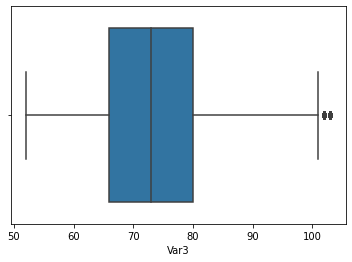

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


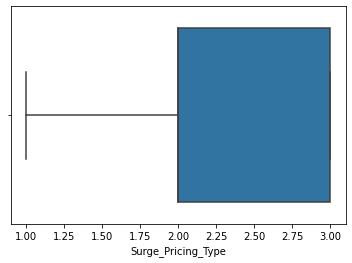

In [38]:
for i in df2.select_dtypes('number'):
  sns.boxplot(df2[i])
  plt.show()

In [39]:
df2.isnull().sum()

Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

In [40]:
df2.shape

(112402, 12)

# checking for multicollinearity

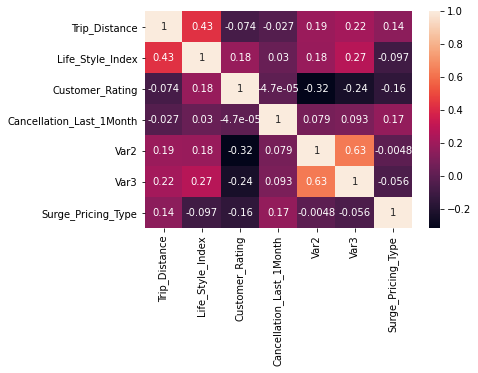

In [41]:
sns.heatmap(df2.corr(),annot=True)

In [42]:
# due to multi-collinearity between var2 and var3, we are dropping var2

In [43]:
df2 = df2.drop(columns=['Var2'])

In [44]:
dummies = pd.get_dummies(data=df2,columns=df2.select_dtypes('object').columns,drop_first=True)

In [45]:
dummies.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,31.16,2.69170,2.14750,0.0,90.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14.12,2.97795,4.93375,0.0,64.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,72.54,3.06236,2.08250,0.0,89.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,31.82,2.70044,3.15125,1.0,66.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,18.34,2.59621,3.15875,0.0,72.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
df2 = dummies.copy()

In [47]:
df2.shape

(112402, 36)

In [48]:
df2 = df2.reset_index(drop=False)

In [49]:
df2 = df2.drop(columns=['index'])

In [50]:
df2.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,31.16,2.69170,2.14750,0.0,90.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14.12,2.97795,4.93375,0.0,64.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,72.54,3.06236,2.08250,0.0,89.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,31.82,2.70044,3.15125,1.0,66.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18.34,2.59621,3.15875,0.0,72.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
x = df2.drop(columns = ['Surge_Pricing_Type'])
y = df2.Surge_Pricing_Type

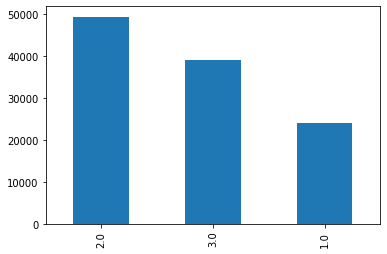

In [52]:
df2['Surge_Pricing_Type'].value_counts().plot(kind='bar')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state = 7)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()
base = lr.fit(xtrain,ytrain)
ypred = base.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
import sklearn.metrics as metrics

In [58]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.79      0.65      0.71      7201
         2.0       0.75      0.86      0.80     14869
         3.0       0.78      0.72      0.75     11651

    accuracy                           0.77     33721
   macro avg       0.77      0.74      0.76     33721
weighted avg       0.77      0.77      0.77     33721



In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()
model_v1 = rf.fit(xtrain,ytrain)
ypred = model_v1.predict(xtest)

In [61]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.83      0.72      0.77      7201
         2.0       0.79      0.86      0.82     14869
         3.0       0.80      0.78      0.79     11651

    accuracy                           0.80     33721
   macro avg       0.81      0.79      0.79     33721
weighted avg       0.80      0.80      0.80     33721



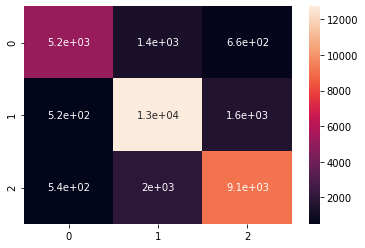

In [62]:
sns.heatmap(metrics.confusion_matrix(ytest,ypred),annot=True)

In [63]:
metrics.confusion_matrix(ytest,ypred)

array([[ 5171,  1369,   661],
       [  523, 12724,  1622],
       [  545,  1996,  9110]])

In [64]:
# The class weight is imbalanced , hence we are proceeding with smote over sampling technique

# Rebuilding data using Synthetic Minority Over-Sampling Technique for Numerical and Categorical (SMOTE-NC) 

In [65]:
from imblearn.over_sampling import SMOTENC

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
df1.isnull().sum()

Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

In [67]:
df1.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
0,B,10,B,A,Female,31.16,2.69170,2.14750,0.0,53.0,90.0,1.0
1,D,3,B,G,Male,14.12,2.97795,4.93375,0.0,47.0,64.0,1.0
2,C,0,C,A,Male,72.54,3.06236,2.08250,0.0,52.0,89.0,1.0
3,B,1,A,A,Male,16.78,2.70013,1.61250,3.0,52.0,85.0,1.0
4,A,9,B,A,Male,18.47,2.77751,1.44000,5.0,55.0,85.0,1.0


In [68]:
strategy = {1.0:40000,2.0:56728,3.0:47720}
cat_index = [0,1,2,3,4,8]
x = df1.drop(columns=['Surge_Pricing_Type'])
y = df1['Surge_Pricing_Type']

In [69]:
sm_nc = SMOTENC(categorical_features=cat_index,sampling_strategy=strategy,random_state=10)
x_sm,y_sm = sm_nc.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [70]:
x_sm = pd.DataFrame(data=x_sm,columns=x.columns)
y_sm = pd.Series(data=y_sm)

In [71]:
x_sm.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
0,B,10,B,A,Female,31.16,2.6917,2.1475,0,53,90
1,D,3,B,G,Male,14.12,2.97795,4.93375,0,47,64
2,C,0,C,A,Male,72.54,3.06236,2.0825,0,52,89
3,B,1,A,A,Male,16.78,2.70013,1.6125,3,52,85
4,A,9,B,A,Male,18.47,2.77751,1.44,5,55,85


In [72]:
df1.shape

(131662, 12)

In [73]:
x_sm.shape

(144448, 11)

In [74]:
df_new = pd.concat([x_sm,y_sm],axis=1)

In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  144448 non-null  object 
 1   Customer_Since_Months        144448 non-null  object 
 2   Confidence_Life_Style_Index  144448 non-null  object 
 3   Destination_Type             144448 non-null  object 
 4   Gender                       144448 non-null  object 
 5   Trip_Distance                144448 non-null  object 
 6   Life_Style_Index             144448 non-null  object 
 7   Customer_Rating              144448 non-null  object 
 8   Cancellation_Last_1Month     144448 non-null  object 
 9   Var2                         144448 non-null  object 
 10  Var3                         144448 non-null  object 
 11  0                            144448 non-null  float64
dtypes: float64(1), object(11)
memory usage: 13.2+ MB


In [76]:
df_new.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,0
0,B,10,B,A,Female,31.16,2.6917,2.1475,0,53,90,1.0
1,D,3,B,G,Male,14.12,2.97795,4.93375,0,47,64,1.0
2,C,0,C,A,Male,72.54,3.06236,2.0825,0,52,89,1.0
3,B,1,A,A,Male,16.78,2.70013,1.6125,3,52,85,1.0
4,A,9,B,A,Male,18.47,2.77751,1.44,5,55,85,1.0


In [77]:
# We can analysis in tableau about Cancellation in last 1 month

In [78]:
df_new.groupby('Type_of_Cab')['Cancellation_Last_1Month'].sum()

Type_of_Cab
A    19965.0
B    27877.0
C    23532.0
D    24998.0
E    11045.0
Name: Cancellation_Last_1Month, dtype: float64

In [79]:
df_new['Cancellation_Last_1Month'].value_counts()

0.0    77889
1.0    39747
2.0    16807
3.0     7225
4.0     1826
5.0      669
6.0      266
7.0       16
8.0        3
Name: Cancellation_Last_1Month, dtype: int64

In [80]:
df_new.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,0
0,B,10,B,A,Female,31.16,2.6917,2.1475,0,53,90,1.0
1,D,3,B,G,Male,14.12,2.97795,4.93375,0,47,64,1.0
2,C,0,C,A,Male,72.54,3.06236,2.0825,0,52,89,1.0
3,B,1,A,A,Male,16.78,2.70013,1.6125,3,52,85,1.0
4,A,9,B,A,Male,18.47,2.77751,1.44,5,55,85,1.0


In [81]:
df_new[df_new['Var3']>150]['Customer_Rating'].mean()

2.5466666666666664

In [82]:
df_new[(df_new['Var3']<=150)&(df_new['Var3']>50)]['Customer_Rating'].mean()

2.8720235846688213

In [83]:
df_new['Var3'].min()

52.0

In [84]:
import scipy.stats as stats

In [85]:
def hyp_testing(pval,sig_lvl):
  if pval > sig_lvl:
    return 'Fail to reject Ho'
  else:
    return 'Ho rejected'

In [86]:
df_new.isnull().sum()

Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
0                              0
dtype: int64

In [87]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  144448 non-null  object 
 1   Customer_Since_Months        144448 non-null  object 
 2   Confidence_Life_Style_Index  144448 non-null  object 
 3   Destination_Type             144448 non-null  object 
 4   Gender                       144448 non-null  object 
 5   Trip_Distance                144448 non-null  object 
 6   Life_Style_Index             144448 non-null  object 
 7   Customer_Rating              144448 non-null  object 
 8   Cancellation_Last_1Month     144448 non-null  object 
 9   Var2                         144448 non-null  object 
 10  Var3                         144448 non-null  object 
 11  0                            144448 non-null  float64
dtypes: float64(1), object(11)
memory usage: 13.2+ MB


In [88]:
df_new = df_new.drop(columns=['Var2'])

In [89]:
df_new['Customer_Since_Months'] = df_new['Customer_Since_Months'].astype('object')
df_new['Trip_Distance'] = df_new['Trip_Distance'].astype('float64')
df_new['Life_Style_Index'] = df_new['Life_Style_Index'].astype('float64')
df_new['Customer_Rating'] = df_new['Customer_Rating'].astype('float64')
df_new['Var3'] = df_new['Var3'].astype('int64')
df_new['Cancellation_Last_1Month'] = df_new['Cancellation_Last_1Month'].astype('int64')


In [90]:
df_new = df_new.rename(columns={0:'Surge_Pricing_Type'})

In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144448 entries, 0 to 144447
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type_of_Cab                  144448 non-null  object 
 1   Customer_Since_Months        144448 non-null  object 
 2   Confidence_Life_Style_Index  144448 non-null  object 
 3   Destination_Type             144448 non-null  object 
 4   Gender                       144448 non-null  object 
 5   Trip_Distance                144448 non-null  float64
 6   Life_Style_Index             144448 non-null  float64
 7   Customer_Rating              144448 non-null  float64
 8   Cancellation_Last_1Month     144448 non-null  int64  
 9   Var3                         144448 non-null  int64  
 10  Surge_Pricing_Type           144448 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 12.1+ MB


In [92]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [93]:
df_mm = df_new.copy()
df_ss = df_new.copy()

In [94]:
for i in df_ss.select_dtypes('number').columns:
  if i != 'Surge_Pricing_Type':
    ss = StandardScaler()
    df_ss[i] = ss.fit_transform(df_ss[[i]])

In [95]:
for i in df_ss.select_dtypes('number').columns:
  if i != 'Surge_Pricing_Type':
    mm = MinMaxScaler()
    df_mm[i] = mm.fit_transform(df_mm[[i]])

In [96]:
df_ss.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type
0,B,10,B,A,Female,-0.505529,-0.555347,-0.748854,-0.733142,1.284130,1.0
1,D,3,B,G,Male,-1.179886,0.833634,2.131015,-0.733142,-0.968719,1.0
2,C,0,C,A,Male,1.132083,1.243220,-0.816038,-0.733142,1.197482,1.0
3,B,1,A,A,Male,-1.074617,-0.514442,-1.301830,2.224514,0.850889,1.0
4,A,9,B,A,Male,-1.007735,-0.138968,-1.480126,4.196285,0.850889,1.0


In [97]:
df_mm.head()

,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type
0,B,10,B,A,Female,0.283235,0.334068,0.429357,0.000,0.246753,1.0
1,D,3,B,G,Male,0.126790,0.421374,0.986747,0.000,0.077922,1.0
2,C,0,C,A,Male,0.663147,0.447118,0.416354,0.000,0.240260,1.0
3,B,1,A,A,Male,0.151212,0.336639,0.322331,0.375,0.214286,1.0
4,A,9,B,A,Male,0.166728,0.360240,0.287822,0.625,0.214286,1.0


In [98]:
df_ss = pd.get_dummies(data = df_ss,columns=df_ss.select_dtypes('object').columns,drop_first=True)
df_mm = pd.get_dummies(data = df_mm,columns=df_mm.select_dtypes('object').columns,drop_first=True)


In [99]:
df_mm.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,0.283235,0.334068,0.429357,0.000,0.246753,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.126790,0.421374,0.986747,0.000,0.077922,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.663147,0.447118,0.416354,0.000,0.240260,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.151212,0.336639,0.322331,0.375,0.214286,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.166728,0.360240,0.287822,0.625,0.214286,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [100]:
df_ss.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Customer_Since_Months_1.0,Customer_Since_Months_2.0,Customer_Since_Months_3.0,Customer_Since_Months_4.0,Customer_Since_Months_5.0,Customer_Since_Months_6.0,Customer_Since_Months_7.0,Customer_Since_Months_8.0,Customer_Since_Months_9.0,Customer_Since_Months_10.0,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-0.505529,-0.555347,-0.748854,-0.733142,1.284130,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.179886,0.833634,2.131015,-0.733142,-0.968719,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1.132083,1.243220,-0.816038,-0.733142,1.197482,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.074617,-0.514442,-1.301830,2.224514,0.850889,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-1.007735,-0.138968,-1.480126,4.196285,0.850889,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Model Building with Standard Scaler

In [101]:
x = df_ss.drop(columns=['Surge_Pricing_Type'])
y = df_ss['Surge_Pricing_Type']

In [102]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state=7)

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier()
base = knn.fit(xtrain,ytrain)
ypred = base.predict(xtest)

In [105]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.72      0.76      0.74     12033
         2.0       0.72      0.75      0.73     16937
         3.0       0.79      0.70      0.74     14365

    accuracy                           0.74     43335
   macro avg       0.74      0.74      0.74     43335
weighted avg       0.74      0.74      0.74     43335



In [106]:
rf = RandomForestClassifier()
model_v1 = rf.fit(xtrain,ytrain)
ypred = model_v1.predict(xtest)

In [107]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.78      0.82     12033
         2.0       0.76      0.85      0.80     16937
         3.0       0.82      0.77      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.80      0.81     43335
weighted avg       0.81      0.80      0.80     43335



In [108]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier()
model_v2 = xgb.fit(xtrain,ytrain)
ypred = model_v2.predict(xtest)

In [110]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.77      0.81     12033
         2.0       0.76      0.86      0.80     16937
         3.0       0.82      0.76      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.79      0.80     43335
weighted avg       0.80      0.80      0.80     43335



In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
gb = GradientBoostingClassifier()
model_v5 = gb.fit(xtrain,ytrain)
ypred = model_v5.predict(xtest)

In [113]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.77      0.81     12033
         2.0       0.75      0.86      0.81     16937
         3.0       0.82      0.76      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.80      0.80     43335
weighted avg       0.81      0.80      0.80     43335



In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dt = DecisionTreeClassifier()
model_v6 = dt.fit(xtrain,ytrain)
ypred = model_v6.predict(xtest)

In [116]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.72      0.73      0.73     12033
         2.0       0.70      0.71      0.70     16937
         3.0       0.72      0.70      0.71     14365

    accuracy                           0.71     43335
   macro avg       0.71      0.71      0.71     43335
weighted avg       0.71      0.71      0.71     43335



# Models using MinmaxScaler


In [117]:
x = df_mm.drop(columns=['Surge_Pricing_Type'])
y = df_mm['Surge_Pricing_Type']

In [118]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state = 7)

In [119]:
knn = KNeighborsClassifier()
model_v1 = knn.fit(xtrain,ytrain)
ypred = model_v1.predict(xtest)

In [120]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.76      0.76      0.76     12033
         2.0       0.72      0.77      0.75     16937
         3.0       0.77      0.71      0.74     14365

    accuracy                           0.75     43335
   macro avg       0.75      0.75      0.75     43335
weighted avg       0.75      0.75      0.75     43335



In [121]:
rf = RandomForestClassifier()
model_v2 = rf.fit(xtrain,ytrain)
ypred = model_v2.predict(xtest)

In [122]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.78      0.82     12033
         2.0       0.76      0.85      0.80     16937
         3.0       0.82      0.77      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.80      0.81     43335
weighted avg       0.81      0.80      0.80     43335



In [123]:
xgb = XGBClassifier()
model_v3 = xgb.fit(xtrain,ytrain)
ypred = model_v3.predict(xtest)

In [124]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.86      0.77      0.81     12033
         2.0       0.76      0.86      0.80     16937
         3.0       0.82      0.76      0.79     14365

    accuracy                           0.80     43335
   macro avg       0.81      0.79      0.80     43335
weighted avg       0.80      0.80      0.80     43335



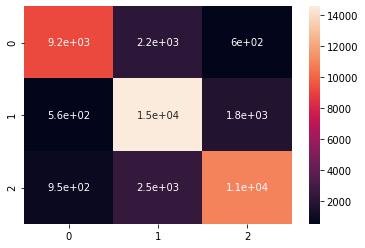

In [125]:
sns.heatmap(metrics.confusion_matrix(ytest,ypred),annot=True)

In [126]:
dt = DecisionTreeClassifier()
model_v3 = dt.fit(xtrain,ytrain)
ypred = model_v3.predict(xtest)

In [127]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.72      0.74      0.73     12033
         2.0       0.70      0.71      0.70     16937
         3.0       0.72      0.70      0.71     14365

    accuracy                           0.71     43335
   macro avg       0.71      0.71      0.71     43335
weighted avg       0.71      0.71      0.71     43335



In [128]:
# We can conclude that both scaling methods are giving similar results
# So we are going with MinMaxScaler

# Main Model Building

Description:
As we move forward , we are mainly focusing on the metric f1-weighted and ways to improve it. The main reason for choosing this metric is because this is the weighted variant of f1-score which is the combination precision and recall which makes the score stable and reliable. We will do two main techniques to improve the f1-weighted score -  GridSearchCV and Cross-Validation

**Base Model (KNN)**

In [129]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [130]:
knn = KNeighborsClassifier()
base_model = knn.fit(xtrain,ytrain)
ypred = base_model.predict(xtest)

In [131]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.76      0.76      0.76     12033
         2.0       0.72      0.77      0.75     16937
         3.0       0.77      0.71      0.74     14365

    accuracy                           0.75     43335
   macro avg       0.75      0.75      0.75     43335
weighted avg       0.75      0.75      0.75     43335



In [132]:
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=knn,X=x,y=y,scoring='f1_weighted',cv=kf)
score_knn = np.mean(scores)
bias_knn = 1-np.mean(score_knn)
var_knn = np.std(score_knn)/np.mean(score_knn)

print('Average f1-weighted score = ',np.mean(score_knn))
print('Bias error(in %) = ',bias_knn * 100 , '%')
print('Variance error(in %) = ',var_knn * 100,'%')

Average f1-weighted score =  0.7491425413096751
Bias error(in %) =  25.085745869032493 %
Variance error(in %) =  0.0 %


# Standalone model - 1  Decision Tree

In [133]:
dt = DecisionTreeClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=dt,X=x,y=y,scoring='f1_weighted',cv=kf)
score_dt = np.mean(scores)
bias_dt = 1-np.mean(score_dt)
var_dt = np.std(score_dt)/np.mean(score_dt)

print('Average f1-weighted score = ',np.mean(score_dt))
print('Bias error(in %) = ',bias_dt * 100 , '%')
print('Variance error(in %) = ',var_dt * 100,'%')

Average f1-weighted score =  0.7135922039590084
Bias error(in %) =  28.640779604099166 %
Variance error(in %) =  0.0 %


# Ensemble Model - 1 Random Forest 

In [134]:
rf = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=rf,X=x,y=y,scoring='f1_weighted',cv=kf)
score_rf = np.mean(scores)
bias_rf = 1-np.mean(score_rf)
var_rf = np.std(score_rf)/np.mean(score_rf)

print('Average f1-weighted score = ',np.mean(score_rf))
print('Bias error(in %) = ',bias_rf * 100 , '%')
print('Variance error(in %) = ',var_rf * 100,'%')

Average f1-weighted score =  0.8037827341172183
Bias error(in %) =  19.621726588278165 %
Variance error(in %) =  0.0 %


# Ensemble Model - 2 AdaBoosting

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
ada = AdaBoostClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=ada,X=x,y=y,scoring='f1_weighted',cv=kf)
score_ada = np.mean(scores)
bias_ada = 1-np.mean(score_ada)
var_ada = np.std(score_ada)/np.mean(score_ada)

print('Average f1-weighted score = ',np.mean(score_ada))
print('Bias error(in %) = ',bias_ada * 100 , '%')
print('Variance error(in %) = ',var_ada * 100,'%')

Average f1-weighted score =  0.786245108479534
Bias error(in %) =  21.3754891520466 %
Variance error(in %) =  0.0 %


# Ensemble Model - 3 XGBoost

In [137]:
xgb = XGBClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=xgb,X=x,y=y,scoring='f1_weighted',cv=kf)
score_xgb = np.mean(scores)
bias_xgb = 1-np.mean(score_xgb)
var_xgb = np.std(score_xgb)/np.mean(score_xgb)

print('Average f1-weighted score = ',np.mean(score_xgb))
print('Bias error(in %) = ',bias_xgb * 100 , '%')
print('Variance error(in %) = ',var_xgb * 100,'%')

Average f1-weighted score =  0.8010246573656294
Bias error(in %) =  19.897534263437056 %
Variance error(in %) =  0.0 %


# Collecting the results for the models we done so far

In [138]:
res = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','XGBoost'],
                    'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_xgb],
                    'Bias Error':[bias_knn,bias_dt,bias_rf,bias_ada,bias_xgb],
                    'Variance Error':[var_knn,var_dt,var_rf,var_ada,var_xgb]})

In [139]:
res

,Models,F1-Weighted,Bias Error,Variance Error
0,KNN,0.749143,0.250857,0.0
1,DecisionTree,0.713592,0.286408,0.0
2,RandomForest,0.803783,0.196217,0.0
3,AdaBoosting,0.786245,0.213755,0.0
4,XGBoost,0.801025,0.198975,0.0


# Stacking and Bagging models

Description :

We will stacking 3 of the best models and find out the f1_weighted score and then out of that we will do bagging of the single best model

In [140]:
from sklearn.ensemble import StackingClassifier,BaggingClassifier

In [141]:
est = [('RandomForest',rf),('AdaBoost',ada),('XGBoost',xgb)]
stack = StackingClassifier(estimators=est,final_estimator = xgb,cv = 5)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=stack,X=x,y=y,scoring='f1_weighted',cv=kf)
score_stack = np.mean(scores)
bias_stack = 1-np.mean(score_stack)
var_stack = np.std(score_stack)/np.mean(score_stack)

print('Average f1-weighted score = ',np.mean(score_stack))
print('Bias error(in %) = ',bias_stack * 100 , '%')
print('Variance error(in %) = ',var_stack * 100,'%')

Average f1-weighted score =  0.8067074633685383
Bias error(in %) =  19.329253663146172 %
Variance error(in %) =  0.0 %


In [142]:
bag = BaggingClassifier(base_estimator=stack)
bag = StackingClassifier(estimators=est,final_estimator = xgb,cv = 5)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=bag,X=x,y=y,scoring='f1_weighted',cv=kf)
score_bag = np.mean(scores)
bias_bag = 1-np.mean(score_bag)
var_bag = np.std(score_bag)/np.mean(score_bag)

print('Average f1-weighted score = ',np.mean(scores))
print('Bias error(in %) = ',bias_bag * 100 , '%')
print('Variance error(in %) = ',var_bag * 100,'%')

Average f1-weighted score =  0.8066626879618257
Bias error(in %) =  19.33373120381743 %
Variance error(in %) =  0.0 %


# Final summary of the data

In [143]:
final_res = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','XGBoost','Stacking','Bagging'],
                    'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_xgb,score_stack,score_bag],
                    'Bias Error':[bias_knn,bias_dt,bias_rf,bias_ada,bias_xgb,bias_stack,bias_bag],
                    'Variance Error':[var_knn,var_dt,var_rf,var_ada,var_xgb,var_stack,var_bag]})

In [145]:
final_res.sort_values('F1-Weighted',ascending=False)

,Models,F1-Weighted,Bias Error,Variance Error
5,Stacking,0.806707,0.193293,0.0
6,Bagging,0.806663,0.193337,0.0
2,RandomForest,0.803783,0.196217,0.0
4,XGBoost,0.801025,0.198975,0.0
3,AdaBoosting,0.786245,0.213755,0.0
0,KNN,0.749143,0.250857,0.0
1,DecisionTree,0.713592,0.286408,0.0


In [146]:
# Stacking Classifier is the best performing model , but as stacking bagging is based on random forest , 
# we are doing gridsearch hyperparameter tuning on random forest

In [147]:
from sklearn.model_selection import GridSearchCV

# Final model using GridSearchCV

In [150]:
rf = RandomForestClassifier()
params = ({'n_estimators': np.arange(100,200,25),
           'max_depth':np.arange(5,22,2),
           'criterion':['gini','entropy']})
kf = KFold(n_splits=3,shuffle=True,random_state=7)
grid = GridSearchCV(estimator=rf,param_grid=params,scoring='f1_weighted',cv=kf,n_jobs=-1)
grid.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fra...n_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=

In [152]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 21, 'n_estimators': 150}

In [155]:
rf = RandomForestClassifier(criterion='entropy',max_depth=21,n_estimators=150)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=rf,X=x,y=y,scoring='f1_weighted',cv=kf)
score_final = np.mean(scores)
bias_final = 1-np.mean(score_final)
var_final = np.std(score_final)/np.mean(score_final)

print('Average f1-weighted score = ',np.mean(scores))
print('Bias error(in %) = ',bias_final * 100 , '%')
print('Variance error(in %) = ',var_final * 100,'%')

Average f1-weighted score =  0.8043249935537643
Bias error(in %) =  19.56750064462357 %
Variance error(in %) =  0.0 %
